In [ ]:
import torch

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат.

In [ ]:
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def forward(self, inputs):
    return inputs @ self.weights.T + self.bias


In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

a = Neuron(weights, bias)
a.forward(inputs)

<ipython-input-3-466da0f0b487>:7: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  return inputs @ self.weights.T + self.bias


tensor(4.8400)

2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат.

In [ ]:
class Linear:
  def __init__(self, weights, biases):
    self.fc = torch.nn.Linear(1, 1)
    self.fc.weight = torch.nn.Parameter(weights.T)
    self.fc.bias = torch.nn.Parameter(biases)


  def forward(self, inputs):
    return self.fc(inputs)

In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]]).T

biases = torch.tensor([3.14, 2.71, 7.2])

a = Linear(weights, biases)
a.forward(inputs)

tensor([ 4.8400,  0.1700, 10.3900], grad_fn=<AddBackward0>)

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

#Решение из предыдущего задания итак работает с бачами, поэтому ничего не надо менять
a.forward(inputs)

tensor([[ 3.7900,  0.9200,  9.0850],
        [ 6.1400, -2.1000,  6.9000],
        [ 2.0400,  0.7610,  6.7260]], grad_fn=<AddmmBackward0>)

2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [ ]:
class Linear:
  def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>
    self.weights = torch.randn(n_features, n_neurons)
    self.biases = torch.randn(n_neurons)

  def forward(self, inputs):
    return inputs @ self.weights + self.biases
  def __call__(self, inputs):
    return self.forward(inputs)

a = Linear(4, 5)
a.forward(inputs)

tensor([[-2.2680,  5.0190,  0.2060, -1.2123, -1.9057],
        [ 0.3384,  2.4350,  4.2570, -3.7279,  5.1086],
        [-3.9627,  3.6103,  7.8598, -3.8835, -0.1780]])

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7).

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

class FC:
    def __init__(self):
        self.fc1 = Linear(4, 20)
        self.fc2 = Linear(20, 7)

    def forward(self, inputs):
        return self.fc2(self.fc1(inputs))


a = FC()
a.forward(inputs)

tensor([[ 28.8546,  17.1965,  17.8622,  11.6449,  17.3729,   5.4890,  39.0965],
        [ 23.6325, -19.3364,  17.8297,  -1.2868,  13.1695, -33.0919,  25.5549],
        [ 19.7421,   0.1665,   6.6463, -10.7149,  15.9667,   3.9884,  40.4214]])

## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
class ReLU:
  def forward(self, inputs):
    return torch.max(inputs, torch.zeros_like(inputs))


a = ReLU()
a.forward(torch.tensor([-1, 2, 3, -2.5]))

tensor([0., 2., 3., 0.])

2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [ ]:
class Softmax:
  def forward(self, inputs):
    return torch.exp(inputs) / torch.exp(inputs).sum(axis=1, keepdims=True)

a = Softmax()
b = torch.randn(4, 3)
b, a.forward(b)

(tensor([[ 0.1460,  0.8466, -0.8028],
         [-0.2359, -1.2116, -1.1914],
         [-1.8523,  0.4307,  0.3596],
         [-0.9921, -1.0806,  0.1295]]),
 tensor([[0.2939, 0.5923, 0.1138],
         [0.5677, 0.2140, 0.2183],
         [0.0502, 0.4918, 0.4580],
         [0.2006, 0.1836, 0.6158]]))

2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
class ELU:
  def __init__(self, alpha):
    self.alpha = alpha

  def forward(self, inputs):
    return torch.where(inputs > 0, inputs, self.alpha * (torch.exp(inputs) - 1))

a = ELU(0.5)

a.forward(torch.tensor([-1, 2, 3, -2.5]))

tensor([-0.3161,  2.0000,  3.0000, -0.4590])

## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return ((y_pred - y_true)**2).mean()

  def __call__(self, y_pred, y_true):
    return self.forward(y_pred, y_true)

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

In [ ]:
a = Linear(4, 1)
metric = MSELoss()

metric(a.forward(inputs), y)

tensor(24.4083)

2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
class CategoricalCrossentropyLoss:
  def forward(self, y_pred, y_true):
    return -torch.log(y_pred[range(len(y_pred)), y_true]).mean()

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                        [2, 5, -1, 2],
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [ ]:
fc = Linear(4, 3)
softmax = Softmax()

loss = CategoricalCrossentropyLoss()

loss.forward(softmax.forward(fc.forward(inputs)), y)


tensor(3.2499)

2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [ ]:
class MSELossL2:
  def __init__(self, lambda_):
    # <создать атрибут объекта alpha>
    self.alpha = lambda_

  def data_loss(self, y_pred, y_true):
    # <подсчет первого слагаемого из формулы>
    return ((y_pred - y_true)**2).mean()

  def reg_loss(self, layer):
    # используйте атрибуты объекта layer, в которых хранятся веса слоя
    return (layer.weights**2).sum() * self.alpha

  def forward(self, y_pred, y_true, layer):
    return self.data_loss(y_pred, y_true) + self.reg_loss(layer)

In [ ]:
mselossl2 = MSELossL2(0.001)

fc = Linear(4, 3)

mselossl2.forward(softmax.forward(fc.forward(inputs)), y, fc)

tensor(0.0191)

## 2.4 Обратное распространение ошибки

2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [ ]:
class SquaredLoss:
  def forward(self, y_pred, y_true):
    return ((y_pred - y_true)**2)

  def backward(self, y_pred, y_true):
    self.dinput = 2 * (y_pred - y_true)

2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [ ]:
class Neuron:
  def __init__(self, n_inputs):
    # <создать атрибуты объекта weights и bias>
    self.weights = torch.randn(n_inputs)
    self.bias = torch.randn(1)

  def forward(self, inputs):
    self.inputs = inputs
    return inputs @ self.weights + self.bias

  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
    self.dweights = dvalue * self.inputs
    self.dinput =  dvalue * self.weights
    self.dbias = dvalue


2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [ ]:
n_inputs = 4
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(100):
  for x_example, y_example in zip(X, y):
    # forward pass
    y_pred = neuron.forward(x_example)
    curr_loss = loss.forward(y_pred, y_example)
    losses.append(curr_loss)

    # backprop
    loss.backward(y_pred, y_example)
    neuron.backward(loss.dinput)

    neuron.weights -= neuron.dweights * learning_rate
    neuron.bias -= neuron.dbias * learning_rate

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


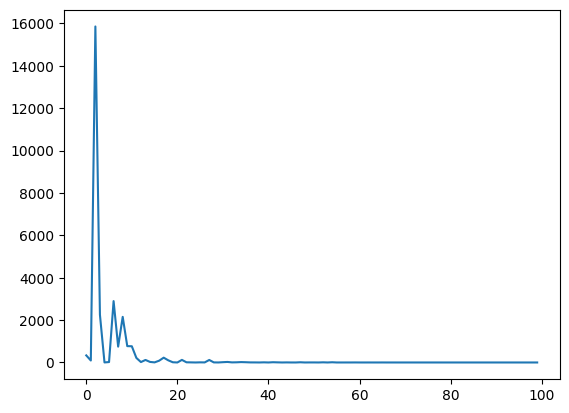

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses[:100]);

2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

In [ ]:
from torch.optim import SGD

n_inputs = 4
learning_rate = 1e4 #  скорость обучения
n_epoch = 10 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

optimizer = SGD([neuron.weights, neuron.bias], lr=learning_rate)

losses = []

for epoch in range(100):
    for x_example, y_example in zip(X, y):
        # forward pass
        y_pred = neuron.forward(x_example)
        curr_loss = loss.forward(y_pred, y_example)
        losses.append(curr_loss)

        # backprop
        loss.backward(y_pred, y_example)
        neuron.backward(loss.dinput)

        optimizer.step()
        optimizer.zero_grad()


Вычисления для этой задачи:
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами


In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return ((y_pred - y_true)**2).mean()

  def backward(self, y_pred, y_true):
    self.dinput = -2 *(y_true - y_pred) / len(y_true)


2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными.

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [ ]:
class Neuron:
  def __init__(self, n_inputs):
    self.weights = torch.randn(n_inputs)
    self.bias = torch.randn(1)

  def forward(self, inputs):
    self.inputs = inputs
    return inputs @ self.weights + self.bias

  def backward(self, dvalue):
    # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
    self.dweights = self.inputs.T @ dvalue
    self.dbias = dvalue.sum()


2.4.2.3 Допишите цикл для настройки весов нейрона

In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [ ]:
n_inputs = 4
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

losses = []

neuron = Neuron(n_inputs)
loss = MSELoss()

print('Лосс до обучения: ', loss.forward(neuron.forward(X), y), '\n')
for epoch in range(100):
    # forward pass
    y_pred = neuron.forward(X)
    curr_loss = loss.forward(y_pred, y)
    losses.append(curr_loss.item())

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    neuron.backward(loss.dinput)

    neuron.weights -= neuron.dweights * learning_rate
    neuron.bias -= neuron.dbias * learning_rate
    # <шаг оптимизации для весов (weights и bias) нейрона>
print('Лосс после обучения: ', loss.forward(neuron.forward(X), y), '\n')

Лосс до обучения:  tensor(7385.9727) 

Лосс после обучения:  tensor(1.5625e-10) 



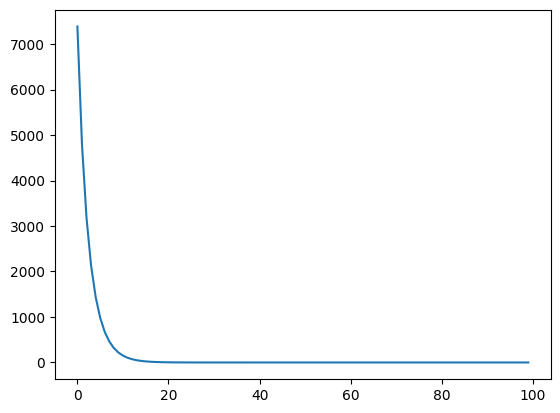

In [ ]:
plt.plot(losses);

2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

In [ ]:
n_inputs = 4
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()

optim = SGD([neuron.weights, neuron.bias], lr=learning_rate)

for epoch in range(100):
    # forward pass
    y_pred = neuron.forward(X)
    curr_loss = loss.forward(y_pred, y)
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    neuron.backward(loss.dinput)
    # <шаг оптимизации для весов (weights и bias) нейрона>

    optim.step()
    optim.zero_grad()

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [ ]:
import torch

class Linear:
    def __init__(self, n_features, n_neurons):
        # Initialize weights and biases with random values
        self.weights = torch.randn(n_features, n_neurons)
        self.biases = torch.zeros(1, n_neurons)  # Initialize biases with zeros

    def forward(self, inputs):
        # Save inputs for backward pass
        self.inputs = inputs
        # Calculate the linear transformation
        self.output = inputs @ self.weights + self.biases
        return self.output

    def backward(self, dvalues):
        # Gradients with respect to weights, biases, and inputs
        self.dweights = self.inputs.T @ dvalues
        self.dbiases = dvalues.sum(dim=0, keepdim=True)
        self.dinputs = dvalues @ self.weights.T


2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [ ]:
model = Linear(4, 1)
loss = MSELoss()
learning_rate = 0.1

for epoch in range(1000):
    # forward pass
    y_pred = model.forward(X).squeeze()
    curr_loss = loss.forward(y_pred, y)
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    model.backward(loss.dinput.reshape(-1, 1))

    model.weights -= model.dweights * learning_rate
    model.biases -= model.dbiases * learning_rate

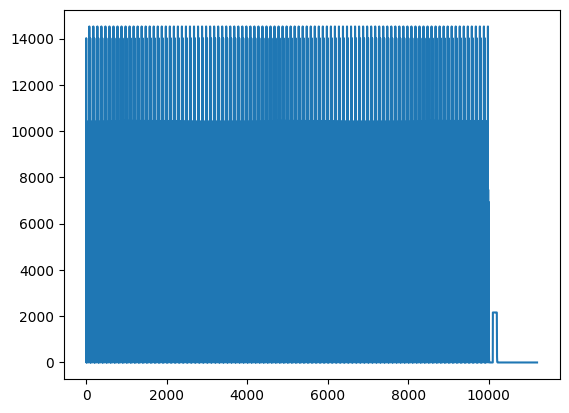

In [ ]:
plt.plot(losses);

2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [ ]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

In [ ]:
class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output

  def backward(self, dvalues):
    self.dinputs = dvalues.clone()
    self.dinputs[self.inputs <= 0] = 0

In [ ]:
# создание компонентов сети
fc1 = Linear(X.shape[1], 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

loss = MSELoss()
lr = 0.02

ys = []
for epoch in range(2001):
  # <forward pass>
  # fc1 > relu1 > fc2 > loss
  out = fc1.forward(X)
  out = relu1.forward(out)
  out = fc2.forward(out)

  data_loss = loss.forward(out, y)

  if epoch % 200 == 0:
    print(f'epoch {epoch} mean loss {data_loss}')
    ys.append(out)

  loss.backward(out, y)
  fc2.backward(loss.dinput)
  relu1.backward(fc2.dinputs)
  fc1.backward(relu1.dinputs)

  fc1.weights -= fc1.dweights * lr
  fc1.biases -= fc1.dbiases * lr
  fc2.weights -= fc2.dweights * lr
  fc2.biases -= fc2.dbiases * lr

epoch 0 mean loss 0.4124763607978821
epoch 200 mean loss 0.014838741160929203
epoch 400 mean loss 0.010319432243704796
epoch 600 mean loss 0.008512590080499649
epoch 800 mean loss 0.00843522697687149
epoch 1000 mean loss 0.008380507118999958
epoch 1200 mean loss 0.008327736519277096
epoch 1400 mean loss 0.008244436234235764
epoch 1600 mean loss 0.008153827860951424
epoch 1800 mean loss 0.008080157451331615
epoch 2000 mean loss 0.008015388622879982


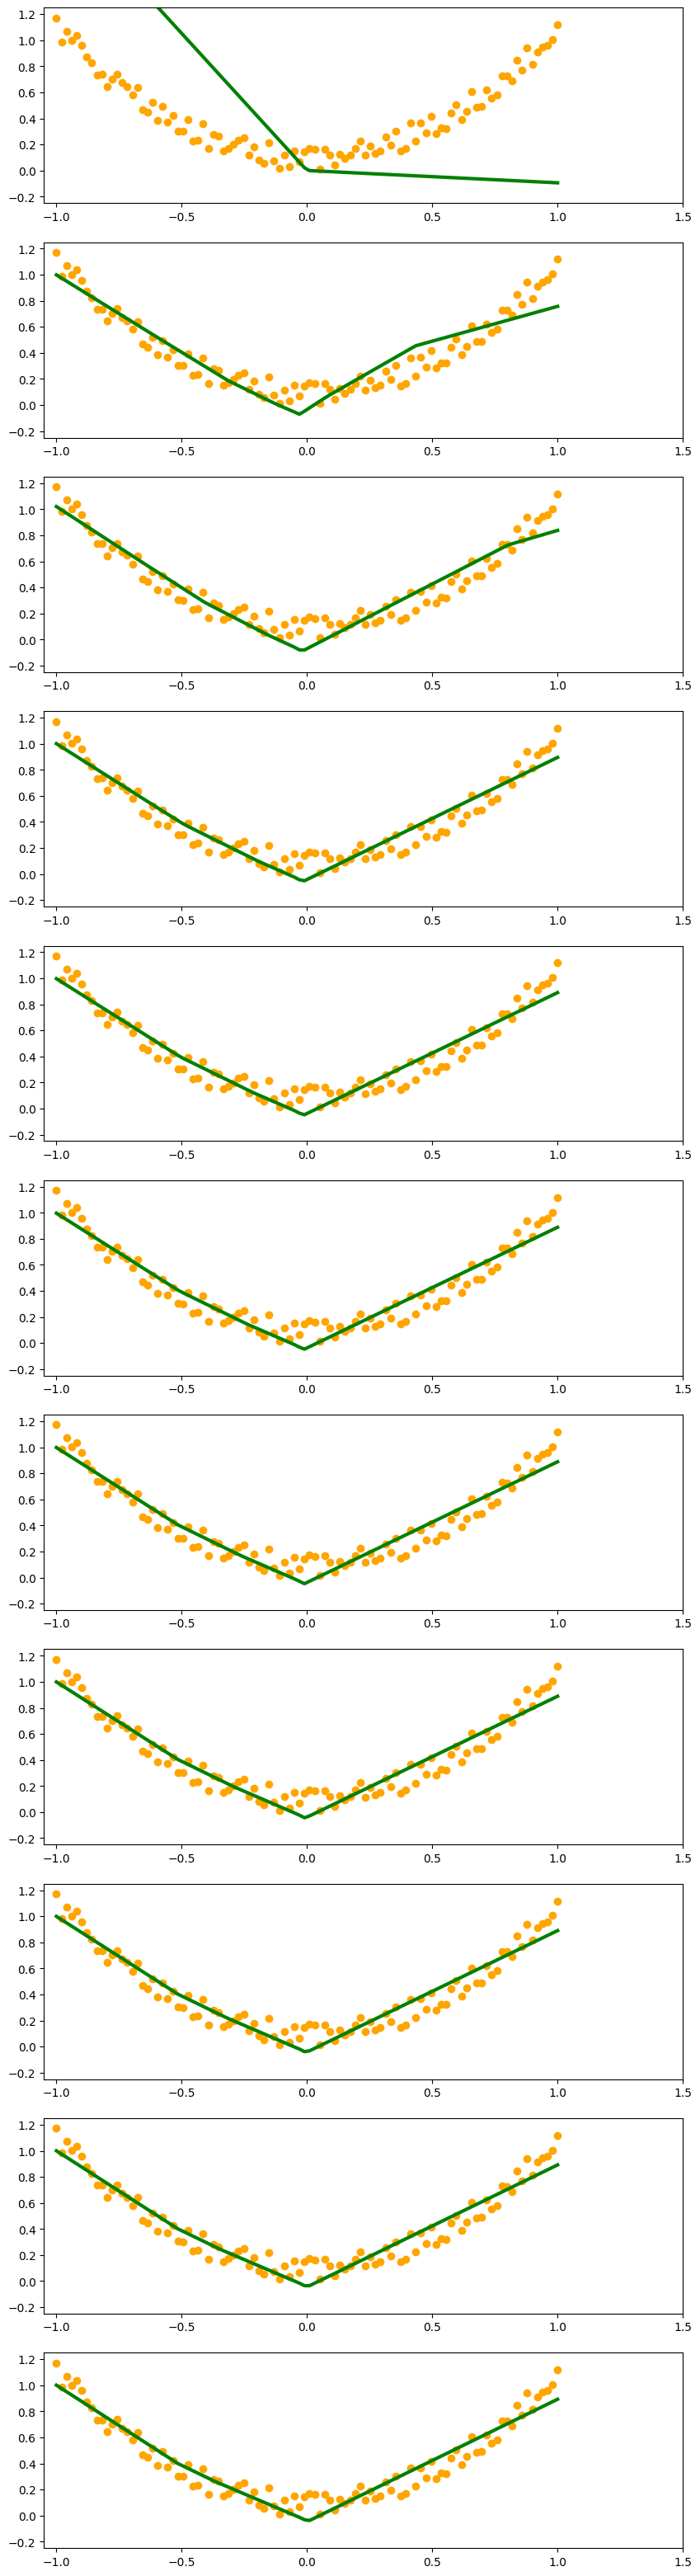

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
  ax.scatter(X.numpy(), y.numpy(), color = "orange")
  ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)